LAB 03: Basic Feature Engineering in Keras
dataset: https://developers.google.com/machine-learning/crash-course/california-housing-data-description
        
reference: https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/courses/machine_learning/deepdive2/feature_engineering/labs/3_keras_basic_feat_eng-lab.ipynb

In [1]:
import os
import tensorflow.keras

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import feature_column as fc
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
#from keras.utils import plot_model

print("TensorFlow version: ",tf.version.VERSION)

TensorFlow version:  2.5.0


In [2]:
!ls

data                         tensorflow_feature_col.ipynb
kerasFeatureEng.ipynb


In [4]:
housing_df = pd.read_csv('./data/housing_pre-proc.csv', error_bad_lines=False)
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
train, test = train_test_split(housing_df, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

13076 train examples
3270 validation examples
4087 test examples


In [18]:
processed_data_path = './played_with_data'
if not os.path.isdir("./played_with_data"):
    os.makedirs("./played_with_data")
!pwd

/Users/mo/Desktop/gcp course/myNotebooks


In [19]:
train_path = processed_data_path + '/housing-train.csv'
val_path = processed_data_path + '/housing-val.csv'
test_path = processed_data_path + '/housing-test.csv'

train.to_csv(train_path, encoding='utf-8', index=False)
val.to_csv(val_path , encoding='utf-8', index=False)
test.to_csv(test_path, encoding='utf-8', index=False)


In [21]:
!head ./data/housing*.csv


longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


In [29]:
# Now we want to wrap the dataframe with tf.data
# so we can use cols in the dataframe to train the model

def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('median_house_value')
    features_labels_tuple = ( dict(dataframe), labels )
    ds = tf.data.Dataset.from_tensor_slices(features_labels_tuple)
    if shuffle:
        ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [30]:
batch_size = 32
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)

In [51]:
for feature_batch, label_batch in train_ds.take(1):
    print(f'All features: {list(feature_batch.keys())} \nNumber of features: {len(feature_batch)} \nElements per batch {len(feature_batch["households"])}\n')
    print('A batch of households:', feature_batch['households'])
    print('A batch of ocean_proximity:', feature_batch['ocean_proximity'])
    print('A batch of targets:', label_batch)



All features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity'] 
Number of features: 9 
Elements per batch 32

A batch of households: tf.Tensor(
[ 107.  428.  247.  572.  662.  288.  273.  955.  408.  351.  898.  518.
  265.  271.  434.  253.  481. 1457.  506.  271.  186.  155.  332.  634.
  347.  288. 1505.  427.  465. 1229.  458.  276.], shape=(32,), dtype=float64)
A batch of ocean_proximity: tf.Tensor(
[b'INLAND' b'NEAR OCEAN' b'<1H OCEAN' b'<1H OCEAN' b'INLAND' b'<1H OCEAN'
 b'<1H OCEAN' b'<1H OCEAN' b'INLAND' b'NEAR BAY' b'<1H OCEAN' b'<1H OCEAN'
 b'NEAR BAY' b'INLAND' b'NEAR OCEAN' b'INLAND' b'<1H OCEAN' b'INLAND'
 b'INLAND' b'NEAR OCEAN' b'NEAR OCEAN' b'INLAND' b'INLAND' b'<1H OCEAN'
 b'<1H OCEAN' b'INLAND' b'<1H OCEAN' b'NEAR OCEAN' b'INLAND' b'NEAR OCEAN'
 b'NEAR OCEAN' b'INLAND'], shape=(32,), dtype=string)
A batch of targets: tf.Tensor(
[181300. 250700. 112500. 351500. 215500. 1426

In [58]:
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income']
# we need to normalize the numeric cols, we make a function that returns another function which
# is the minmax function which will use in tf.feature_column
# minmax datascaling scales the data to be in the range from 0 - 1, it is a unity scaling normalization
# here is the pythonic implementation. This will only be used during training
def get_scale_function(feature):
    def minmax(current_element):
        mini = train[feature].min()
        maxi = train[feature].max()
        return (current_element - mini)/(maxi-mini)
    return(minmax)

In [60]:
feature_columns = []
for feature_name in numeric_cols:
    scale_input_fn = get_scale_function(feature_name)
    feature_col = fc.numeric_column(feature_name, normalizer_fn = scale_input_fn)
    feature_columns.append(feature_col)
print('Total number of feature columns: ', len(feature_columns))


Total number of feature columns:  8


In [61]:
# this is our input layer
feature_layer = tf.keras.layers.DenseFeatures(feature_columns, dtype='float64') 

model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(12, input_dim=8, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='linear',  name='median_house_value') # output layer
])

In [65]:
# compile and train
# Model compile
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

# Model Fit
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=32)

Epoch 1/32
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
388/409 [===========================>..] - ETA: 0s - loss: 31462799360.0000 - mse: 31462799360.0000WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'longitude': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'latitude': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'housing_median_age': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'total_rooms': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'total_bedrooms': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'population': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, 'households': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, 'median_income': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'ocean_proximity': <tf.Tensor 'ExpandDims_5:0' sh

In [67]:
def plot_curves(history, metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize=(10, 5))

    for idx, key in enumerate(metrics):  
        ax = fig.add_subplot(nrows, ncols, idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left');
        plt.grid()

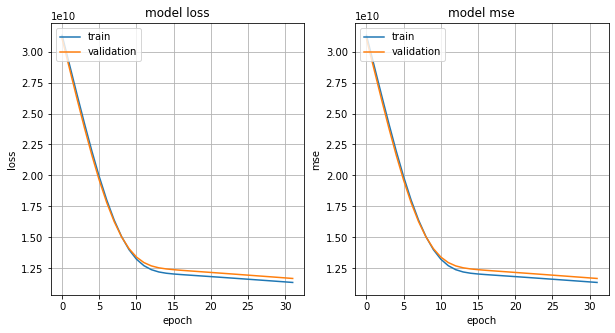

In [68]:
plot_curves(history, ['loss', 'mse'])


In [69]:
# load test data
test_data = pd.read_csv(test_path)
test_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,4087.00000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-119.57492,35.607255,28.549547,2670.996330,540.298997,1421.934426,501.468314,3.916259,211431.102031
std,1.98374,2.103225,12.666084,2350.670833,440.251448,1143.860029,397.709464,1.919097,117113.541865
min,-124.18000,32.550000,2.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.79000,33.930000,18.000000,1411.500000,290.000000,773.000000,276.000000,2.600000,122000.000000
50%,-118.48000,34.250000,29.000000,2122.000000,431.000000,1150.000000,408.000000,3.575000,183800.000000
75%,-118.02000,37.710000,37.000000,3149.000000,645.000000,1704.500000,597.000000,4.795750,271150.000000
max,-114.55000,41.860000,52.000000,39320.000000,6210.000000,16305.000000,5358.000000,15.000100,500001.000000


In [73]:
# make a dataset from the pandas dataframe
def test_dataframe_to_ds(features, batch_size=256):
    # we dont have labels this time 
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
test_ds = test_dataframe_to_ds(dict(test_data))


In [74]:
predicted_median_house_value = model.predict(test_ds)
predicted_median_house_value

Consider rewriting this model with the Functional API.


array([[174445.36],
       [193625.17],
       [221210.02],
       ...,
       [195842.55],
       [226151.67],
       [201061.02]], dtype=float32)

In [75]:
# lets do one manuel prediction

# Ocean_proximity is INLAND
model.predict({
    'longitude': tf.convert_to_tensor([-121.86]),
    'latitude': tf.convert_to_tensor([39.78]),
    'housing_median_age': tf.convert_to_tensor([12.0]),
    'total_rooms': tf.convert_to_tensor([7653.0]),
    'total_bedrooms': tf.convert_to_tensor([1578.0]),
    'population': tf.convert_to_tensor([3628.0]),
    'households': tf.convert_to_tensor([1494.0]),
    'median_income': tf.convert_to_tensor([3.0905]),
    'ocean_proximity': tf.convert_to_tensor(['INLAND'])
}, steps=1)

Consider rewriting this model with the Functional API.


array([[227055.98]], dtype=float32)

# now that we have a baseline lets do some feature engineering to improve the model

In [76]:
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                'total_bedrooms', 'population', 'households', 'median_income']

bucketized_cols = ['housing_median_age']

# indicator columns,Categorical features
categorical_cols = ['ocean_proximity']

In [78]:
feature_columns_2 = []
for feature_name in numeric_cols:
    scale_input_fn = get_scale_function(feature_name)
    feature_col = fc.numeric_column(feature_name, normalizer_fn = scale_input_fn)
    feature_columns_2.append(feature_col)
print('Total number of feature columns: ', len(feature_columns_2))

Total number of feature columns:  8


In [79]:
# now instead of feading the houseing_median_age as a raw number we want to catogerize it
# ie put it in different brackets, so houses younger than 10yrs, and houses btwn 10 and 20 yrs, 60yers plus and so on
# so we use the bucketized column function
age = fc.numeric_column("housing_median_age")
age_buckets = fc.bucketized_column(age, boundaries=[10, 20, 30, 40, 50, 60, 80, 100])
feature_columns_2.append(age_buckets)


In [80]:
# feature crosses is to combine multiple features into a single feature
# we create a feature cross of 'housing_median_age' and 'ocean_proximity'.

vocabulary = housing_df['ocean_proximity'].unique()
ocean_proximity = fc.categorical_column_with_vocabulary_list('ocean_proximity',
                                                             vocabulary)
crossed_feature = fc.crossed_column([age_buckets, ocean_proximity],
                                    hash_bucket_size=1000)
crossed_feature = fc.indicator_column(crossed_feature)
feature_columns_2.append(crossed_feature)

print('Total number of feature columns: ', len(feature_columns_2))


Total number of feature columns:  10


In [82]:
# Model create
# `tf.keras.layers.DenseFeatures()` is a layer that produces a dense Tensor based on given feature_columns.
feature_layer = tf.keras.layers.DenseFeatures(feature_columns_2,
                                              dtype='float64')

# `tf.keras.Sequential()` groups a linear stack of layers into a tf.keras.Model.
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(12, input_dim=8, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(1, activation='linear',  name='median_house_value')
])

# Model compile
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

# Model Fit
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=32)

Epoch 1/32
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.
404/409 [============================>.] - ETA: 0s - loss: 55326343168.0000 - mse: 55326343168.0000WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'longitude': <tf.Tensor 'ExpandDims_3:0' shape=(None, 1) dtype=float64>, 'latitude': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) dtype=float64>, 'housing_median_age': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=float64>, 'total_rooms': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=float64>, 'total_bedrooms': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=float64>, 'population': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=float64>, 'households': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=float64>, 'median_income': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=float64>, 'ocean_proximity': <tf.Tensor 'ExpandDims_5:0' sh

In [83]:

loss, mse = model.evaluate(train_ds)
print("Mean Squared Error", mse)

409/409 [==============================] - 0s 956us/step - loss: 11295094784.0000 - mse: 11295094784.0000
Mean Squared Error 11295094784.0


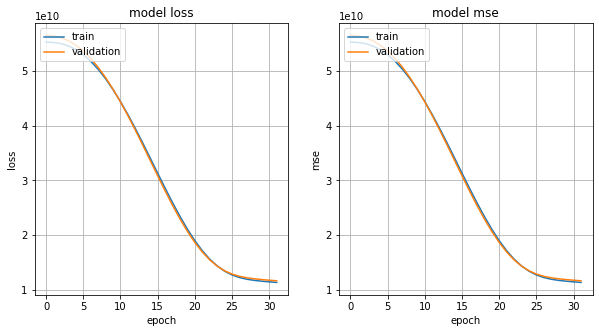

In [84]:
plot_curves(history, ['loss', 'mse'])


In [85]:
model.predict({
    'longitude': tf.convert_to_tensor([-122.43]),
    'latitude': tf.convert_to_tensor([37.63]),
    'housing_median_age': tf.convert_to_tensor([34.0]),
    'total_rooms': tf.convert_to_tensor([4135.0]),
    'total_bedrooms': tf.convert_to_tensor([687.0]),
    'population': tf.convert_to_tensor([2154.0]),
    'households': tf.convert_to_tensor([742.0]),
    'median_income': tf.convert_to_tensor([4.9732]),
    'ocean_proximity': tf.convert_to_tensor(['NEAR OCEAN'])
}, steps=1)

Consider rewriting this model with the Functional API.


array([[224429.27]], dtype=float32)